# Project 3

Kartik Chopra

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Reading CSV File

In [2]:
df = pd.read_csv('german_credit_data.csv')

In [3]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


# Processing Data

In [4]:

print("number if Rows",df.shape[0])
print("Number of Columsn", df.shape[1])

number if Rows 1000
Number of Columsn 10


In [5]:
print("any missing vlues?", df.isnull().values.any())

any missing vlues? True


In [6]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [7]:
per_missing= df.isnull().sum() * 100/ len(df)
per_missing

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64

In [8]:
df.dropna(axis=0)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
7,35,male,3,rent,little,moderate,6948,36,car,good
9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
989,48,male,1,own,little,moderate,1743,24,radio/TV,good
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [9]:
dup_df=df.duplicated().any()

In [10]:
print("are therea any duplicate data?",dup_df)

are therea any duplicate data? False


In [11]:
df.describe(include='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


## Handle Missing Values

In [12]:
df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')

This code replaces missing values in the "Saving accounts" and "Checking account" fields with the text "unknown". It assigns a placeholder value to guarantee that valuable rows in the dataset are not lost owing to missing data.

## One-Hot Encoding for Categorical Variables

In [13]:
categorical_vars = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

df_encoded = pd.get_dummies(df, columns=categorical_vars)

print(df_encoded.head())


   Age  Job  Credit amount  Duration  Risk  Sex_female  Sex_male  \
0   67    2           1169         6  good       False      True   
1   22    2           5951        48   bad        True     False   
2   49    1           2096        12  good       False      True   
3   45    2           7882        42  good       False      True   
4   53    2           4870        24   bad       False      True   

   Housing_free  Housing_own  Housing_rent  ...  Checking account_rich  \
0         False         True         False  ...                  False   
1         False         True         False  ...                  False   
2         False         True         False  ...                  False   
3          True        False         False  ...                  False   
4          True        False         False  ...                  False   

   Checking account_unknown  Purpose_business  Purpose_car  \
0                     False             False        False   
1                     

Creates binary  variables for each category of each specified categorical variable in order to transform them into a format that machine learning algorithms may use. It improves the dataset such that it is acceptable for modelling without making assumptions about ordinal connections that do not exist.

## Histogram Visualization and Log Transformation

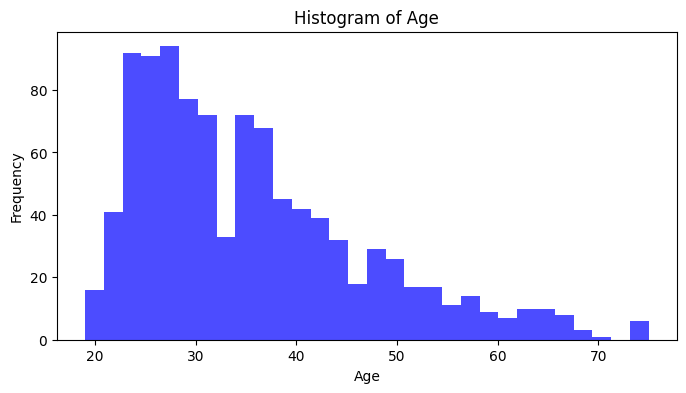

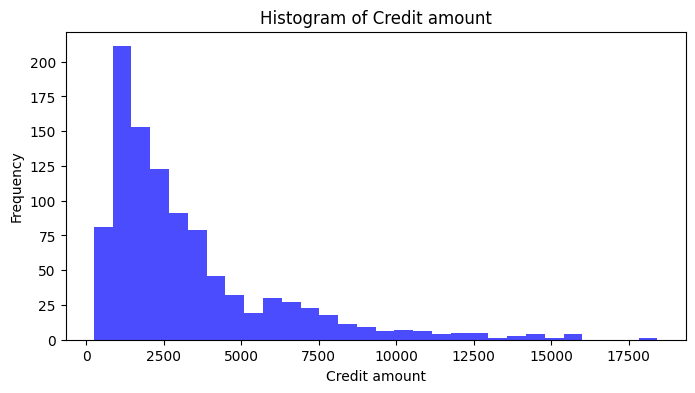

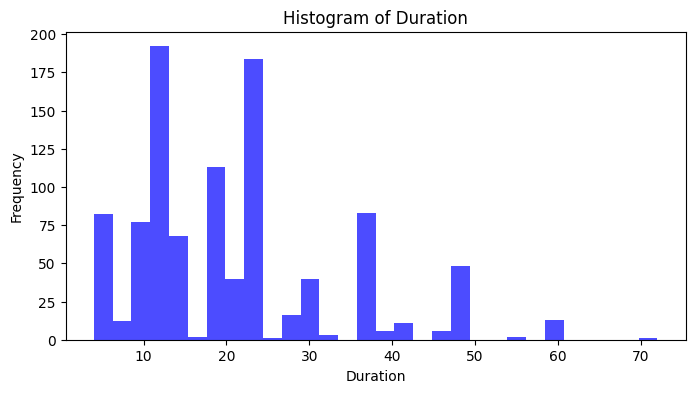

In [14]:
import matplotlib.pyplot as plt
import numpy as np

numerical_cols = ['Age', 'Credit amount', 'Duration']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=30, alpha=0.7, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


The loop generates histograms for certain numerical columns to illustrate their distribution. It is a first step to discover skewness in data distributions, which may require log transformations for normalisation.

## Feature Scaling

In [15]:

numerical_cols = ['Age', 'Credit amount', 'Duration']

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())


        Age     Sex  Job Housing Saving accounts Checking account  \
0  2.766456    male    2     own         unknown           little   
1 -1.191404  female    2     own          little         moderate   
2  1.183312    male    1     own          little          unknown   
3  0.831502    male    2    free          little           little   
4  1.535122    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0      -0.745131 -1.236478             radio/TV  good  
1       0.949817  2.248194             radio/TV   bad  
2      -0.416562 -0.738668            education  good  
3       1.634247  1.750384  furniture/equipment  good  
4       0.566664  0.256953                  car   bad  


Standard scaling is used to calculate numerical characteristics (by removing the mean and scaling to unit variance). Feature scaling is critical for many machine learning algorithms to guarantee that no single feature dominates the others just due to its size.

## Clustering with Only Numerical Features

Elbow Method to Find Best Number of Clusters

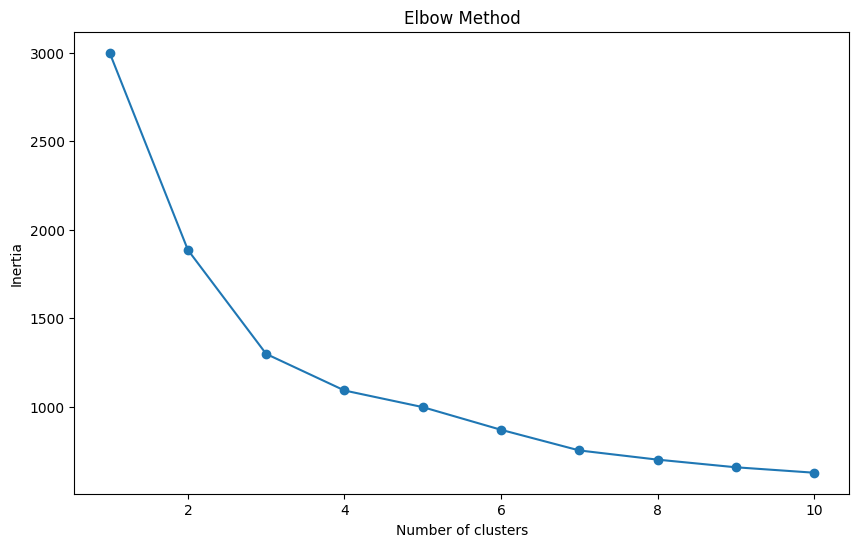

In [16]:
df_numerical = df[numerical_cols]

# Elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42).fit(df_numerical)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Code uses the "elbow" graph to calculate the best amount of clusters for K-means clustering. It depicts the inertia (within-cluster sum of squares) for various cluster counts, with the "elbow" point indicating a suitable balance between the number of clusters and their compactness.

## PCA for visualization

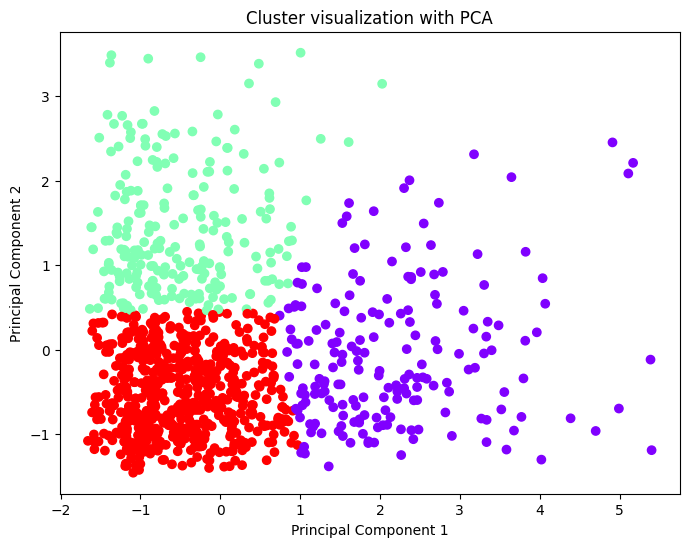

In [17]:

k = 3 
kmeans = KMeans(n_clusters=k, random_state=42).fit(df_numerical)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_numerical)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['PC1'], principalDf['PC2'], c=kmeans.labels_, cmap='rainbow')
plt.title('Cluster visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


This code uses PCA to reduce the dataset to two dimensions, and then depicts the resultant main components. It colours data points according to their cluster assignments, allowing for a visual assessment of how well the clustering worked in a reduced dimensional space.

## Implement K-Fold CV and Use a Classifier

In [18]:
X = df_encoded.drop('Risk', axis=1)  
y = df_encoded['Risk']


In [19]:

clf = RandomForestClassifier(n_estimators=100, random_state=42)

scores = cross_val_score(clf, X, y, cv=5)

print(f"Accuracy: {scores.mean()} (+/- {scores.std() * 2})")


Accuracy: 0.7460000000000001 (+/- 0.027856776554368263)


K-Fold Cross-Validation is used to evaluate the performance of a classifier (in this example, the RandomForestClassifier) on a dataset. It divides the data into five sections, trains the model on four, and tests it on the fifth in a rotating pattern, resulting in a reliable assessment of the model's predicted performance.

# Credit Amount Distribution by Risk

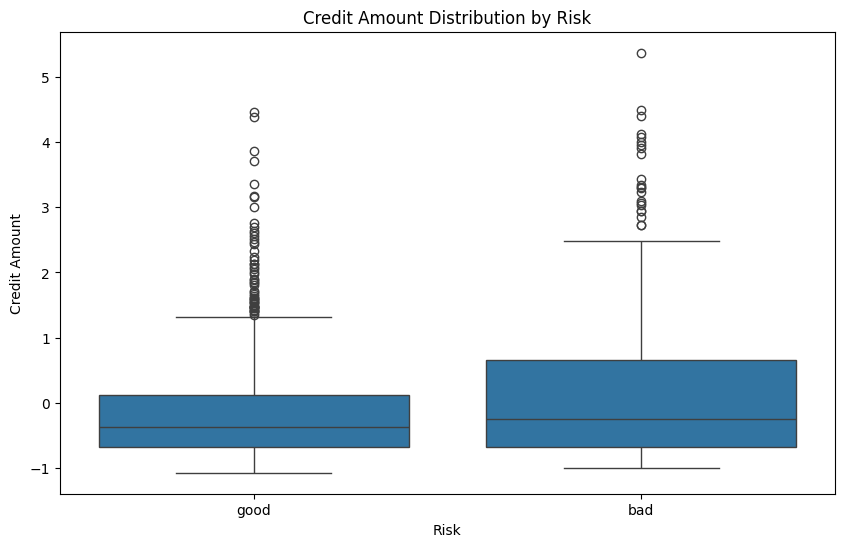

In [20]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk', y='Credit amount', data=df)
plt.title('Credit Amount Distribution by Risk')
plt.xlabel('Risk')
plt.ylabel('Credit Amount')
plt.show()


# Age Distribution by Risk Category

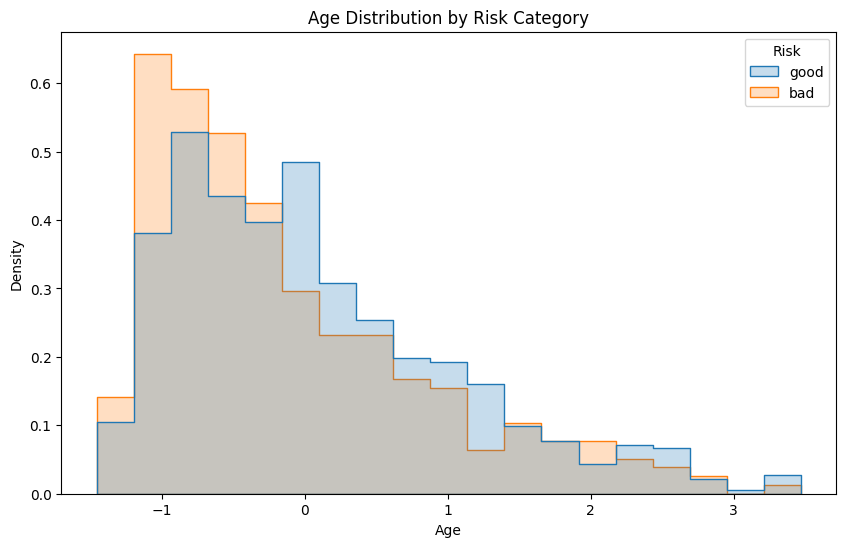

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Risk', element="step", stat="density", common_norm=False)
plt.title('Age Distribution by Risk Category')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


# Number of Applicants by Job Type and Risk

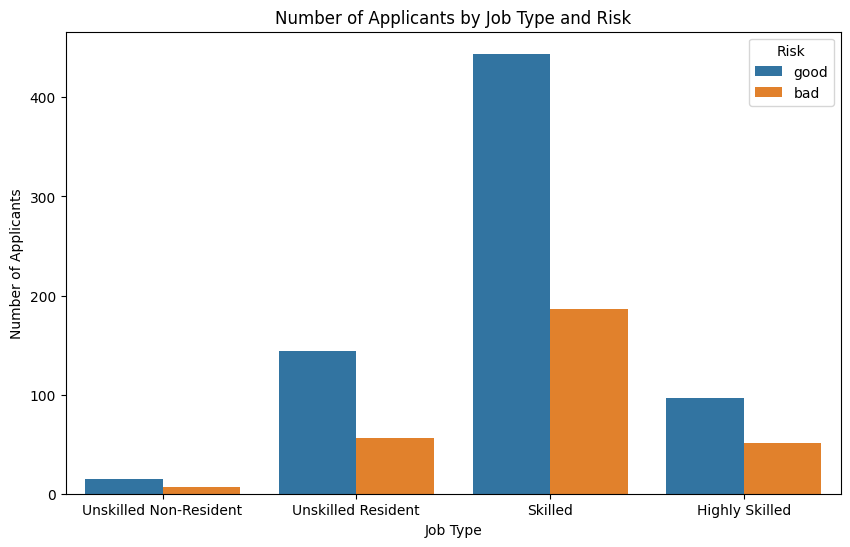

In [22]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Job', hue='Risk', data=df)
plt.title('Number of Applicants by Job Type and Risk')
plt.xlabel('Job Type')
plt.ylabel('Number of Applicants')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Unskilled Non-Resident', 'Unskilled Resident', 'Skilled', 'Highly Skilled'])
plt.legend(title='Risk')
plt.show()


# Duration of Credit by Risk

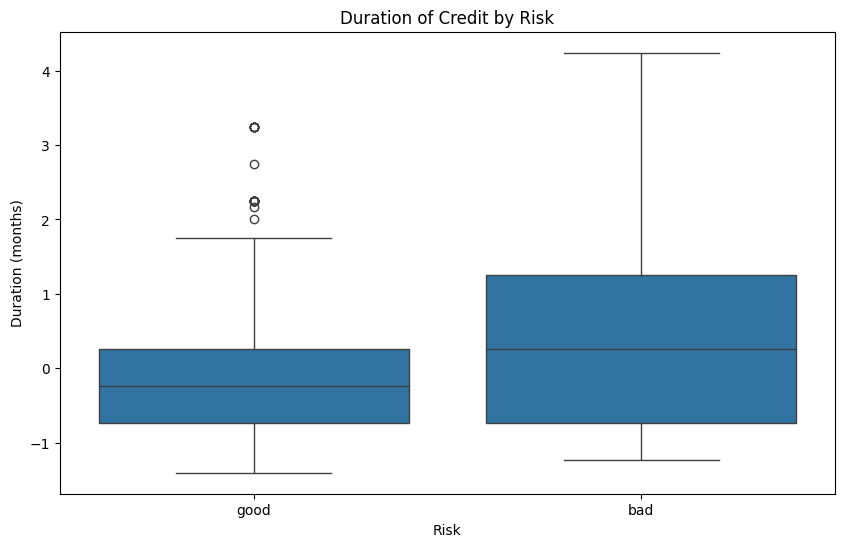

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Risk', y='Duration', data=df)
plt.title('Duration of Credit by Risk')
plt.xlabel('Risk')
plt.ylabel('Duration (months)')
plt.show()


Throughout our study and analysis of the German Credit Dataset, we used a methodical strategy to prepare and interpret the data, including a variety of data science methodologies. We started by fixing missing values and used one-hot encoding to convert categorical data into machine-learning-friendly formats. We learned about the distribution of numerical characteristics and their relevance to credit risk categorization using visual analysis such as histograms and boxplots. We employed feature scaling and PCA to improve our dataset for modelling. We gained a more in-depth understanding of the elements impacting credit risk by using K-means clustering and K-Fold Cross-Validation on a classifier. This thorough examination highlights the value of data preparation, visualisation, and modelling in revealing insights inside financial information, emphasising the potential.

